In [77]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, export_graphviz # for our classification model
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


## Data Description
___
___Using the same data as i used in the previous assignment___
+ This DataSet is one of two datasets that were created using red and white wine samples. The features are objective measurements of the composition of the wines. The output { quality } or as shall be further on infered as the class is based on sensory data. This is a median of evaluations given by three wine expert on each instance of wine.  
#### Features 
1. Fixed Acidity
2. Volatile acidity
3. Citric Acid
4. Residual Sugar
5. Chlorides
6. Free Sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol
#### Class
12. Quality { score between 0 and 10 }

#### Number of Instances
+ 4898 
+ ___Limited to only white wine instances___


In [78]:
# Load data into work book 
filePath = './wine_quality/winequality-white.csv'
# Read data into pandas data frame
# Get column headers from the first row in the data
df = pd.read_csv(filePath, sep=";", header=0)

In [79]:
# confirm the data recently loaded, show the first 10 rows
df[:10]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [80]:
# Map function to apply to class column to make it binary 
def make_binary(x):
    ''' Given an integer btw 0 and 10 return 0 if it is 5 or less 
    and 1 if it is 5 or more
    '''
    if x <= 5:
        return 0
    else:
        return 1

In [81]:
# transform the target variable to be binary
df['quality'] = df['quality'].apply(make_binary)

In [82]:
# check
df[:10]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,1


In [83]:
# check distribution of the class values
counts = df['quality'].value_counts()
counts = list(counts)
total = counts[0] + counts[1]
greater_than_5 = counts[1]
less_or_equal_5 = counts[0]
print ("White wines that have quality greater than 5 : {:04.2f}".format((greater_than_5 / total) * 100 ))
print ("White wines that have quality less than or equal to 5 : {:04.2f}".format((less_or_equal_5 / total) * 100))

White wines that have quality greater than 5 : 33.48
White wines that have quality less than or equal to 5 : 66.52


In [84]:
# Select Dependent class
y = df["quality"]
# Select indepedent features
X = df[:] # make a copy in case i need original df 
del X["quality"]
X[:10]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0


In [85]:
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: quality, dtype: int64

In [86]:
# Now use sci kit's train test split to select training and test Data
from sklearn.model_selection import train_test_split

In [87]:
# check shape 
print ("{} shape is {}".format("X", X.shape))
print ("{} shape is {}".format("Y", y.shape))

X shape is (4898, 11)
Y shape is (4898,)


In [88]:
# Test-Size : 70 percent , Train-Size : 30 percent
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [89]:
X_train[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
196,6.4,0.29,0.44,3.6,0.197,75.0,183.0,0.99420,3.01,0.38,9.1
4552,6.4,0.55,0.26,9.6,0.027,20.0,104.0,0.99240,3.22,0.73,13.1
133,6.6,0.24,0.27,15.8,0.035,46.0,188.0,0.99820,3.24,0.51,9.2
2517,7.3,0.51,0.29,11.3,0.034,61.0,224.0,0.99683,3.14,0.56,9.5
3034,6.9,0.25,0.47,8.4,0.042,36.0,156.0,0.99604,3.15,0.55,9.4


In [90]:
X_test[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2762,7.3,0.32,0.35,1.40,0.050,8.0,163.0,0.99244,3.24,0.42,10.7
42,7.0,0.31,0.26,7.40,0.069,28.0,160.0,0.99540,3.13,0.46,9.8
1419,7.6,0.14,0.74,1.60,0.040,27.0,103.0,0.99160,3.07,0.40,10.8
3664,5.0,0.29,0.54,5.70,0.035,54.0,155.0,0.98976,3.27,0.34,12.9
2125,6.0,0.28,0.22,12.15,0.048,42.0,163.0,0.99570,3.20,0.46,10.1


In [91]:
count1 = Y_train.agg('sum')
overall = len(y)
count0 = overall - count1
tes_count1 = Y_test.agg('sum')
tes_count0 = overall - tes_count1

In [92]:
print("Postive in Training : {:.2f}% | Negative in Training : {:.2f}%".format((count1/overall * 100 ),
                                                                            (count0/overall * 100)))
print("Postive in Testing : {:.2f}% | Negative in Testing : {:.2f}%".format((tes_count1/overall * 100 ),
                                                                            (tes_count0/overall * 100)))

Postive in Training : 47.26% | Negative in Training : 52.74%
Postive in Testing : 19.25% | Negative in Testing : 80.75%


In [93]:
clf = DecisionTreeClassifier("entropy")
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [94]:
col_list = list(df.columns)
# remove target column name since this is needed for visualization 
col_list.remove("quality")


In [95]:
# Train Decision Tree Model
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [96]:
import graphviz

In [97]:
# Visualize tree
dot_data = export_graphviz(clf,
                          out_file=None,
                          feature_names=col_list,
                          filled=True,
                          impurity=True,
                          rounded=True,
                          special_characters=False)
graph = graphviz.Source(dot_data)
graph.render("White Wine Decision Tree")

'White Wine Decision Tree.pdf'

In [98]:
# Get Test Instance 
X_test[:1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2762,7.3,0.32,0.35,1.4,0.05,8.0,163.0,0.99244,3.24,0.42,10.7


In [99]:
test_instance = X_test[:1]
test_instance["predic-y"] = clf.predict(test_instance) # predicted by Decision tree classfier model
test_instance["actual-Y"] = Y_test[:1]
test_instance

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predic-y,actual-Y
2762,7.3,0.32,0.35,1.4,0.05,8.0,163.0,0.99244,3.24,0.42,10.7,0,0


In [100]:
check_df = X_test[:]

In [101]:
check_df["predicted"] = clf.predict(X_test)
check_df["actual"] = Y_test[:]

In [102]:
check_df[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predicted,actual
2762,7.3,0.32,0.35,1.40,0.050,8.0,163.0,0.99244,3.24,0.42,10.7,0,0
42,7.0,0.31,0.26,7.40,0.069,28.0,160.0,0.99540,3.13,0.46,9.8,1,1
1419,7.6,0.14,0.74,1.60,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,1,1
3664,5.0,0.29,0.54,5.70,0.035,54.0,155.0,0.98976,3.27,0.34,12.9,1,1
2125,6.0,0.28,0.22,12.15,0.048,42.0,163.0,0.99570,3.20,0.46,10.1,1,0


### Evaluate the performance of the model we just trained
_____

In [103]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

### Scikit-learn Metrics Classification report
---

In [104]:
y_true = Y_test[:]
y_pred = clf.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.68      0.62      0.65       527
          1       0.80      0.83      0.82       943

avg / total       0.75      0.76      0.76      1470



### Scikit-learn Metrics Accuracy Score
___
+ If {normalize == True}, return the correctly classified samples (float), else it returns the number of correctly classified samples (int).

In [105]:
print("Normalized Accuracy Score for your model is {:.3f}".format(accuracy_score(y_true, y_pred)))
print("Correctly classified samples {:d} out of {} instances".format(accuracy_score(y_true, y_pred, normalize=False),
                                                          len(Y_test)))

Normalized Accuracy Score for your model is 0.759
Correctly classified samples 1115 out of 1470 instances


### Scikit-learn precision values  
___  
+ The precision is the ratio tp / (tp + fp) 
    + where tp is the number of true positives 
    + fp the number of false positives. 
    + The precision is intuitively the ability of the classifier not to label as positive a sample that is     negative.  
+ The best value is 1 and the worst value is 0. 

In [106]:
model_macro_prediction_score = precision_score(y_true, y_pred)
print ("Precision Value is {:.2f}".format(model_macro_prediction_score))

Precision Value is 0.80


##### Interpretation
+ Rougly 80 percent of the positives the model assigned were true positives
+ Roughly 20 percent of the wine instances in testing were incorrectly given a positive


### Scikit learn Recall Score
___
+ The recall is the ratio tp / (tp + fn) where 
    + tp is the number of true positives and  
    + fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.  

+ The best value is 1 and the worst value is 0.  

In [107]:
model_macro_recall_score = recall_score(y_true, y_pred)
print ("Recall Value is {:.2f}".format(model_macro_recall_score))

Recall Value is 0.83


#### interpretation
---
+ Rougly 83 percent of actual good wines were label as good
+ missed the other good wines that were classified as false negatives

### F1_Score : a weighted average of the precision and recall

In [108]:
f1_score = f1_score(y_true, y_pred)
print ("F1 Score Value is {:.2f}".format(f1_score))

F1 Score Value is 0.82


### Confusion matrix
---

In [109]:
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[328 199]
 [156 787]]


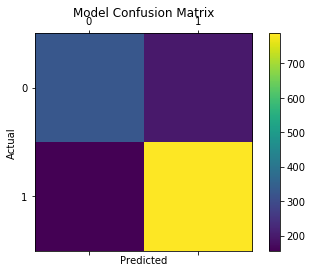

In [110]:
plt.matshow(cm, fignum=0)
plt.title('Model Confusion Matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

|          |             |           |
|----------|:-----------:|----------:|
|          |     N       |     P     |
|   N      |   TN (333)  |  FP (194) |
|   P      |   FN (158)  |  TP (785) |


### Scikit learn metrics R.O.C curve
____
+ A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate

In [111]:
# get y_score for roc_curve function
y_score = clf.predict_proba(X_test)
# class =[0,1] positive probability [1]
# y_score_pos = [score[1] for score in y_score[] ]

In [112]:
fpr, tpr, thresholds = roc_curve(y_true, y_score[: ,1])

### ROC Curve

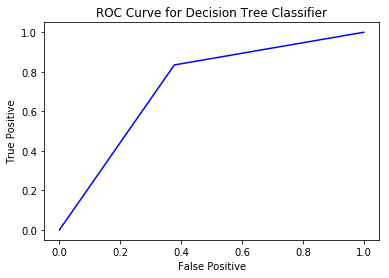

In [113]:
# ROC Curve
plt.plot(fpr, tpr,'b-')
plt.title("ROC Curve for Decision Tree Classifier")
plt.ylabel("True Positive")
plt.xlabel("False Positive")
plt.show()

### Precision / Recall Curve
---
+ The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
+ The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

In [114]:
precision, recall, threshold = precision_recall_curve(y_true, y_score[: ,1])

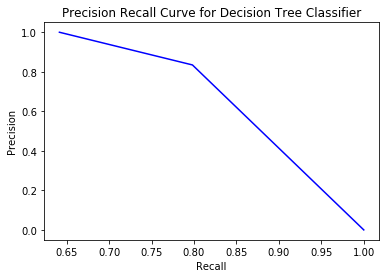

In [115]:
plt.plot(precision, recall,'b-')
plt.title("Precision Recall Curve for Decision Tree Classifier")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()